### Summary:

- In this project we were to analyze the impact of different variables on our target variable (SalePrice). 
- After briefly taking a look at our target varible, it makes sense to analyze the whole dataset, which contains 1460 rows and 81 columns.
- We defined a function, which helped us to get an overview of all the variables as well as their correlation with our target variable.
- During our data cleaning process, we checked for duplicates and found none. Next step was to drop the columns, where there are any nulls by creating a new dataframe.
- We used this adjusted dataframe to plot the correlation between the variables. Because of lots of data, we picked the 7 categorical and 7 numerical values and plotted some of them.
- We want back to the table, which we made to analyze the whole dataset and figured out(which was a bit obvious) that Overall Quality has the most impact on Sale Price. Because of that we started to analyze the impact on the Sale Price from the next 5 variables with having the Overall Quality in sight. These are GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFltSF and plotted them.
- The rest was just out of the curiousity in order to understand the relationships between the variables.

In [43]:
# Importing the necessary packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
%matplotlib inline
sns.set()
sns.set_style("ticks")

In [2]:
# Importing the dataset

df = pd.read_csv('train.csv')

### Defining the target variable

In [3]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

    there are 1460 houses sold
    the average price of the sold house is 180921
    lowest sold house was only 34900
    the most expensive one was 755000
    75% of the houses sold were sold for less or equal to 214000

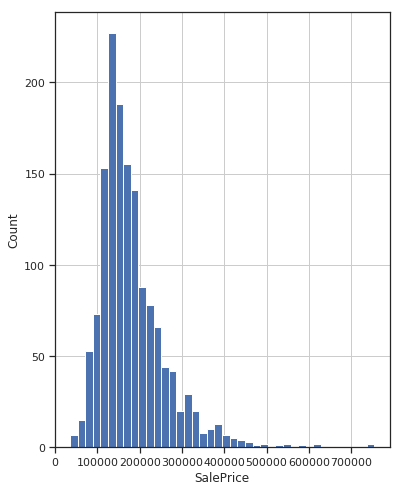

In [4]:
# Plotting the distribution of the target variable using histogram

plt.figure(figsize = (6,8))
plt.hist(df['SalePrice'], bins = 40)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(True)
plt.show()

    the target variable is skewed and heavily-tailed distributed. 

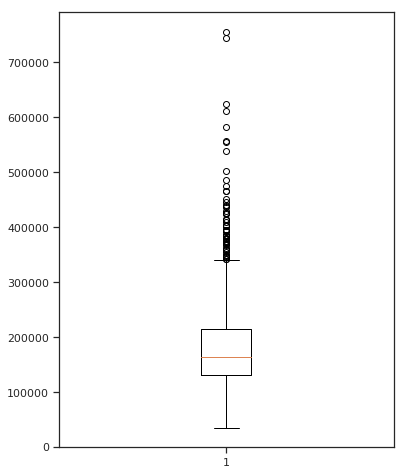

In [5]:
# Plotting the distribution of the target variable using boxplot

plt.figure(figsize = (6,8))
plt.boxplot(df['SalePrice'])
plt.show()

    we can see that there are a lot of outliers
    let's inspect them

##### Let's check what is the top 10% of the most expensive houses sold 

In [6]:
df['SalePrice'].quantile(np.arange(0,1,.1))

0.0     34900.0
0.1    106475.0
0.2    124000.0
0.3    135500.0
0.4    147000.0
0.5    163000.0
0.6    179280.0
0.7    198620.0
0.8    230000.0
0.9    278000.0
Name: SalePrice, dtype: float64

    the top 10% of these houses were sold for more than 278000

##### what about top 1%?

In [7]:
df['SalePrice'].quantile(np.arange(0.9,1,.01))

0.90    278000.00
0.91    285000.00
0.92    295914.96
0.93    311305.00
0.94    318028.06
0.95    326100.00
0.96    344151.48
0.97    374230.00
0.98    394931.06
0.99    442567.01
Name: SalePrice, dtype: float64

    the top 1% of the houses were sold for more than 442567.01

In [8]:
# Just out of the curiousity let's check 
# by how much % the price has risen from top 10% to top 1%

rise = int(442567.01 / 278000 * 100)

print('The price has increased by',rise,'%')

The price has increased by 159 %


### Getting the insides about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

    we have here 81 columns and it is a lot. my suggestion would be to filter them based on the missing values.

In [10]:
# Checking for the duplicates

df.duplicated().value_counts()

False    1460
dtype: int64

    there are no duplicates since all the results received were False

In [11]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [12]:
details = rstr(df, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1460, 81)
___________________________
Data types:
 object     43
int64      35
float64     3
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr SalePrice
SalePrice,int64,1460,663,0,0.000000,"[[208500, 181500, 223500, 140000, 250000, 1430...",1.882876,6.536282,1.000000
OverallQual,int64,1460,10,0,0.000000,"[[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]]",0.216944,0.096293,0.790982
GrLivArea,int64,1460,861,0,0.000000,"[[1710, 1262, 1786, 1717, 2198, 1362, 1694, 20...",1.366560,4.895121,0.708624
GarageCars,int64,1460,5,0,0.000000,"[[2, 3, 1, 0, 4]]",-0.342549,0.220998,0.640409
GarageArea,int64,1460,441,0,0.000000,"[[548, 460, 608, 642, 836, 480, 636, 484, 468,...",0.179981,0.917067,0.623431
TotalBsmtSF,int64,1460,721,0,0.000000,"[[856, 1262, 920, 756, 1145, 796, 1686, 1107, ...",1.524255,13.250483,0.613581
1stFlrSF,int64,1460,753,0,0.000000,"[[856, 1262, 920, 961, 1145, 796, 1694, 1107, ...",1.376757,5.745841,0.605852
FullBath,int64,1460,4,0,0.000000,"[[2, 1, 3, 0]]",0.036562,-0.857043,0.560664
TotRmsAbvGrd,int64,1460,12,0,0.000000,"[[8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]]",0.676341,0.880762,0.533723
YearBuilt,int64,1460,112,0,0.000000,"[[2003, 1976, 2001, 1915, 2000, 1993, 2004, 19...",-0.613461,-0.439552,0.522897


   let's discuss this table:
   - TotalBsmtSF, 1stFlrSF, GrLivArea are high right skewed, heavy-tailed distributed and have high correlation with the Sale Price, which might be interesting for us
   - LotArea, KitchenAbvGr, ScreenPorch, EnclosedPorch, MasVnrArea, OpenPorchSF, LotFrontage, BsmtFinSF1, WoodDeckSF, MSSubClass are skewed, heavy-tailed distributed and have a good correlation with the Sale Price
   - MiscVal, TSsnPorch, LowQualFinSF, BsmtFinSF2, BsmtHalfBa are high skewed, heavy-tailed distributed and have low     correlation with Sale Price
    

In [13]:
# Let's have a quick look at the numerical data

display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [14]:
# Removing columns with missing values

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
len(df.columns)

81

In [16]:
df_adj = df.dropna(axis = 'columns')

In [17]:
df_adj.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [18]:
len(df_adj.columns)

62

In [19]:
heatmap_df = df_adj[[ 'SalePrice','MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]

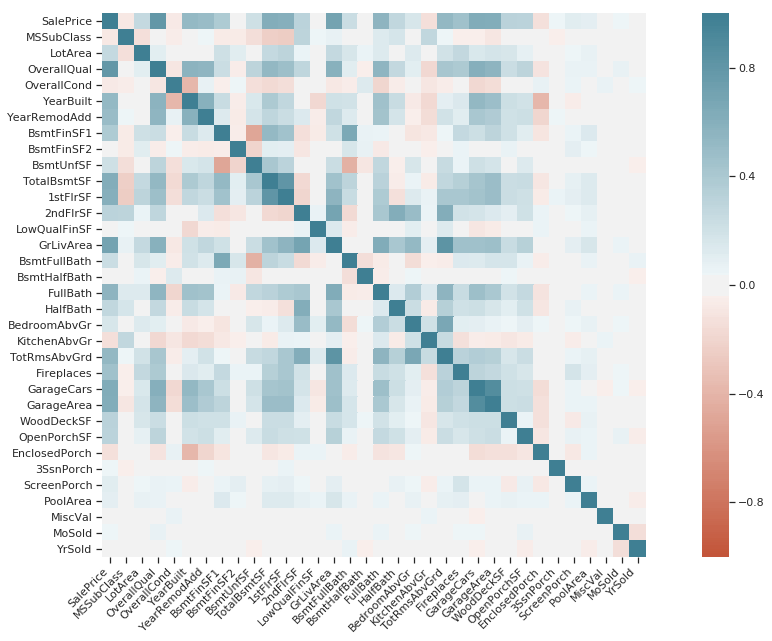

In [20]:
corr1 = heatmap_df.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

    still too many irrelevant data, let's split some of the columns into categorical and numerical

In [21]:
num_list = ['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
cat_list = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

df_adj = df_adj[num_list + cat_list]

In [22]:
df_adj.shape

(1460, 14)

    we have now 14 columns instead of 81, which is a lot easier to analyze

#### Analyting and plotting numerical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c68fa20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb25f28>]], dtype=object)

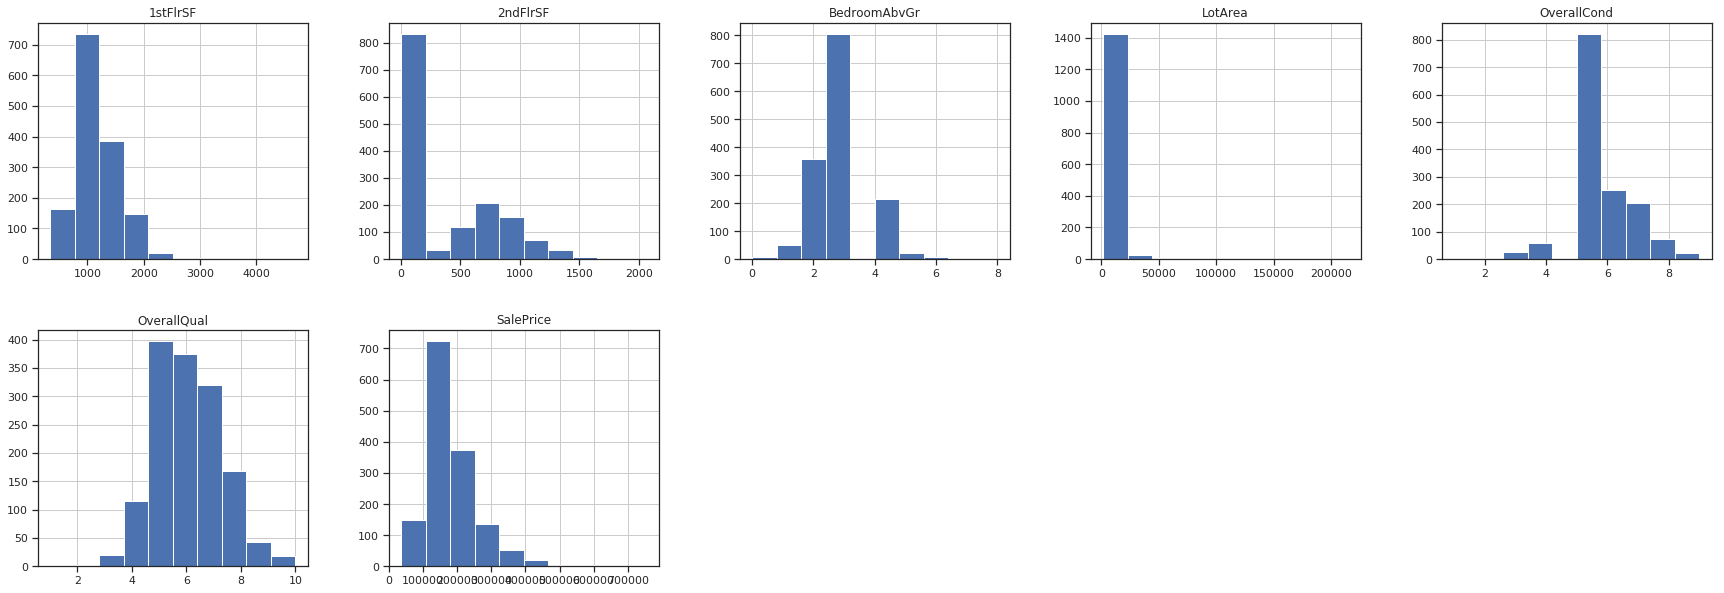

In [23]:
df_adj[num_list].hist(figsize = (30,10), layout = (2,5))

#### Analyzing categorical variables

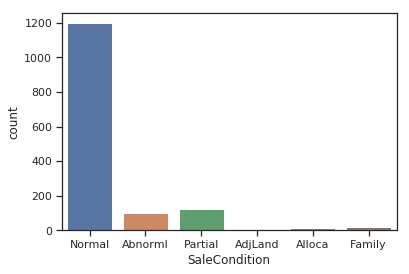

In [24]:
# Let's check the Sale Condition

sns.countplot(df_adj['SaleCondition'])

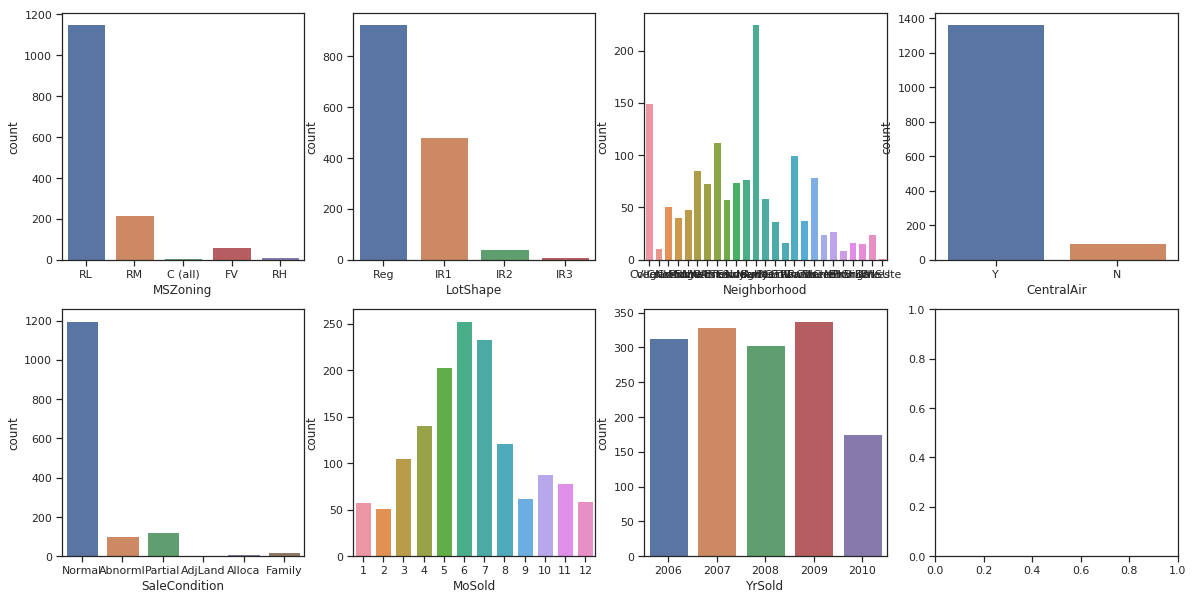

In [25]:
# Now let's do it for every categorical variable

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_list, ax.flatten()):
    sns.countplot(df_adj[variable], ax=subplot)

    we can see that most of the houses has been sold during the late spring/summer months. the next question might be: what has happend in the year 2010 with such a decrease in sales

In [26]:
# Inspecting the year 2010

df_adj[df_adj['YrSold'] == 2010].groupby('MoSold').count()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,YrSold
MoSold,,,,,,,,,,,,,
1,10,10,10,10,10,10,10,10,10,10,10,10,10
2,15,15,15,15,15,15,15,15,15,15,15,15,15
3,21,21,21,21,21,21,21,21,21,21,21,21,21
4,39,39,39,39,39,39,39,39,39,39,39,39,39
5,48,48,48,48,48,48,48,48,48,48,48,48,48
6,36,36,36,36,36,36,36,36,36,36,36,36,36
7,6,6,6,6,6,6,6,6,6,6,6,6,6


    it shows us, that the data in 2010 is until the month 7

#### Analyzing the impact of these variables on our target variable

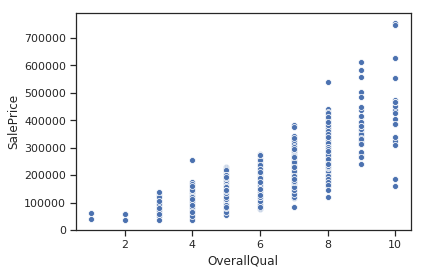

In [27]:
# Let's check the relationships between OverallQual and the Saleprice

sns.scatterplot(x = df_adj['OverallQual'], y = df_adj['SalePrice'])

    from this graph we can see, that if the overall quality is increasing, so does the sale price
    
    it is actually really obvious, that the overall quality has the most impact on the sale price,
    so let's check the impact of the OverallQual on next strong correlation variables with sale price,
    such as GrLivArea(0.70), GarageCars(0.64), GarageArea(0.62), TotalBsmtSF(0.61), 1StFlrSF(0.60)

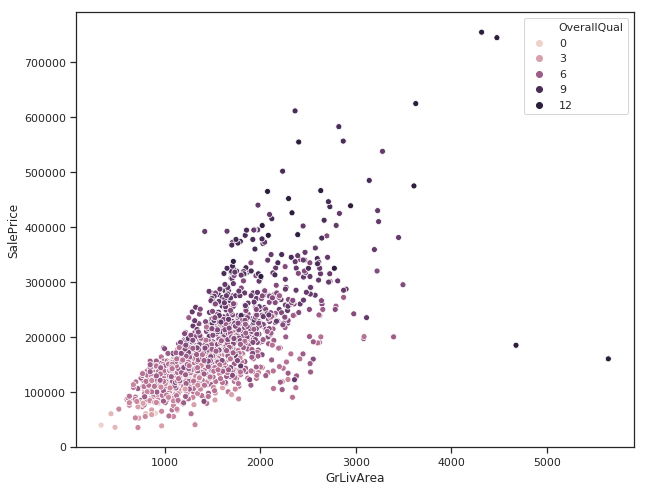

In [28]:
# SalePrice, OverallQual and GrLivArea

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'], hue = df['OverallQual'])

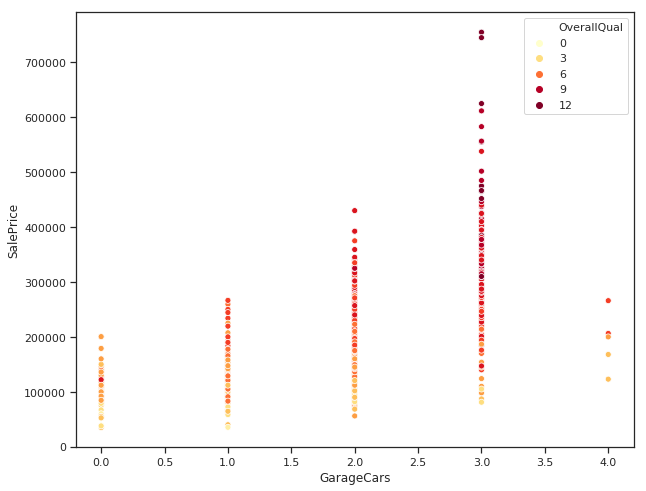

In [40]:
# SalePrice, OverallQual and GarageCars

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(x = df['GarageCars'], y = df['SalePrice'], hue = df['OverallQual'], palette= 'YlOrRd')

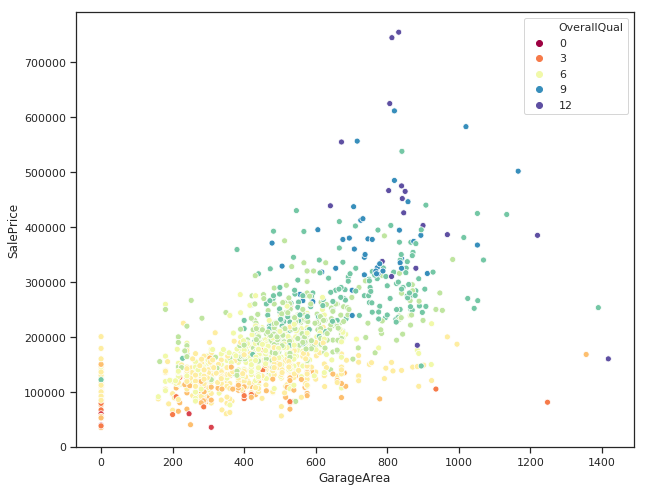

In [41]:
# SalePrice, OverallQual and GarageArea

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(x = df['GarageArea'], y = df['SalePrice'], hue = df['OverallQual'],palette= 'Spectral')

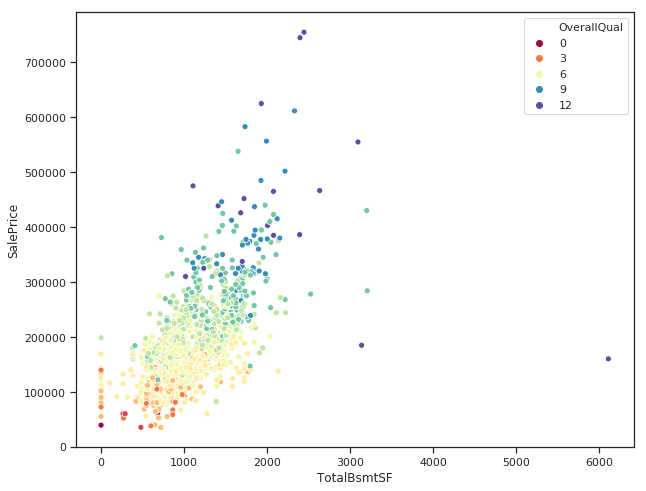

In [42]:
# SalePrice, OverallQual and TotalBsmtSF

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(x = df['TotalBsmtSF'], y = df['SalePrice'], hue = df['OverallQual'],palette= 'Spectral')

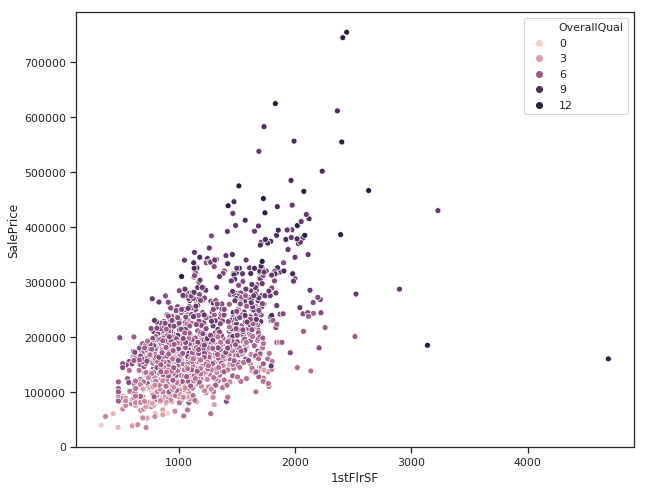

In [39]:
# SalePrice, OverallQual and 1stFlrSF

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(x = df['1stFlrSF'], y = df['SalePrice'], hue = df['OverallQual'])

#### Let's check the correlations between numerical and categorical variables

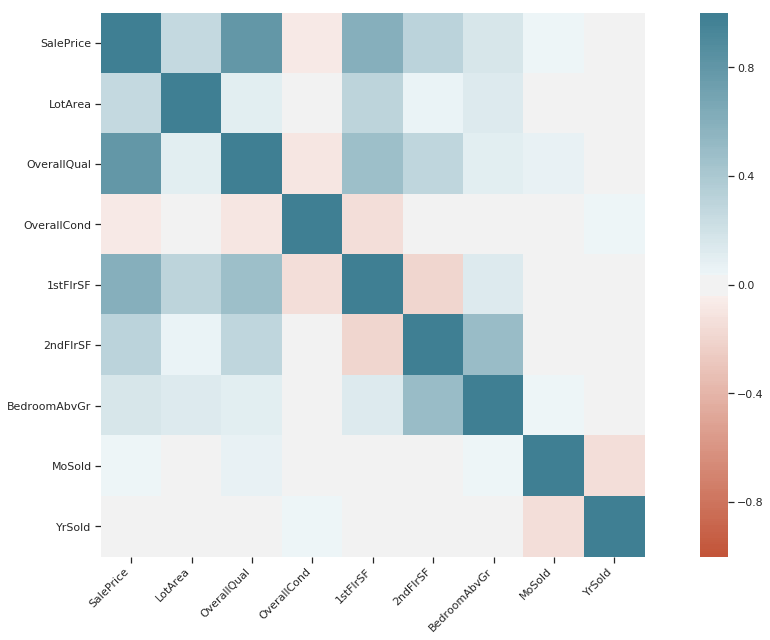

In [36]:
# Let's test some correlations, but firstly let's have a look at this heatmap

corr = df_adj.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

    we can see, that SalePrice and OverallQual have a strong correlation
    as well as SalePrice and 1stFlrSF
    2ndFlrSF has a strong correlation with the BedroomAbvGr

[Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blueste')]

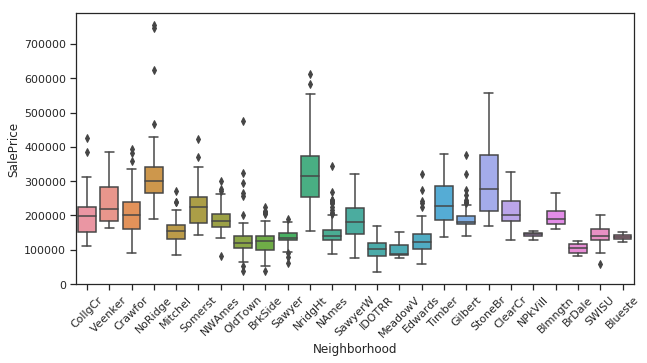

In [30]:
# Correlation between Neighbourhood and Sale Price in detail using the boxplot

plt.figure(figsize=(10,5))
chart = sns.boxplot(x = df_adj['Neighborhood'], y = df_adj['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

    as we can see, the most expensive houses are in NridgHt and StoneBr

[Text(0, 0, 'Normal'),
 Text(0, 0, 'Abnorml'),
 Text(0, 0, 'Partial'),
 Text(0, 0, 'AdjLand'),
 Text(0, 0, 'Alloca'),
 Text(0, 0, 'Family')]

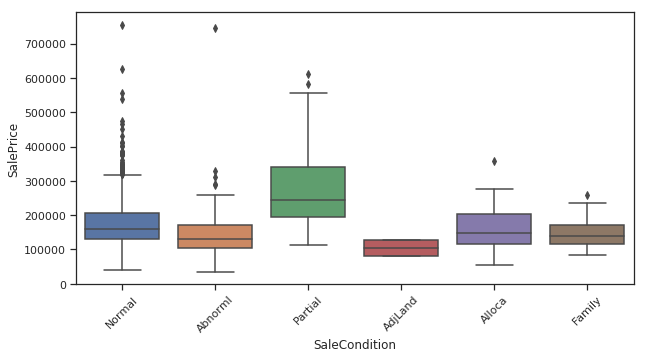

In [31]:
# Correlation between Sale Condition and Sale Price in detail using the boxplot

plt.figure(figsize=(10,5))
chart = sns.boxplot(x = df_adj['SaleCondition'], y = df_adj['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'Reg'), Text(0, 0, 'IR1'), Text(0, 0, 'IR2'), Text(0, 0, 'IR3')]

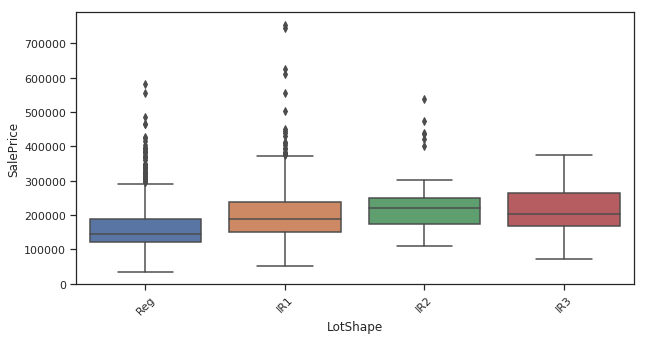

In [32]:
# Correlation between Lot Shape and Sale Price

plt.figure(figsize=(10,5))
chart = sns.boxplot(x = df_adj['LotShape'], y = df_adj['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

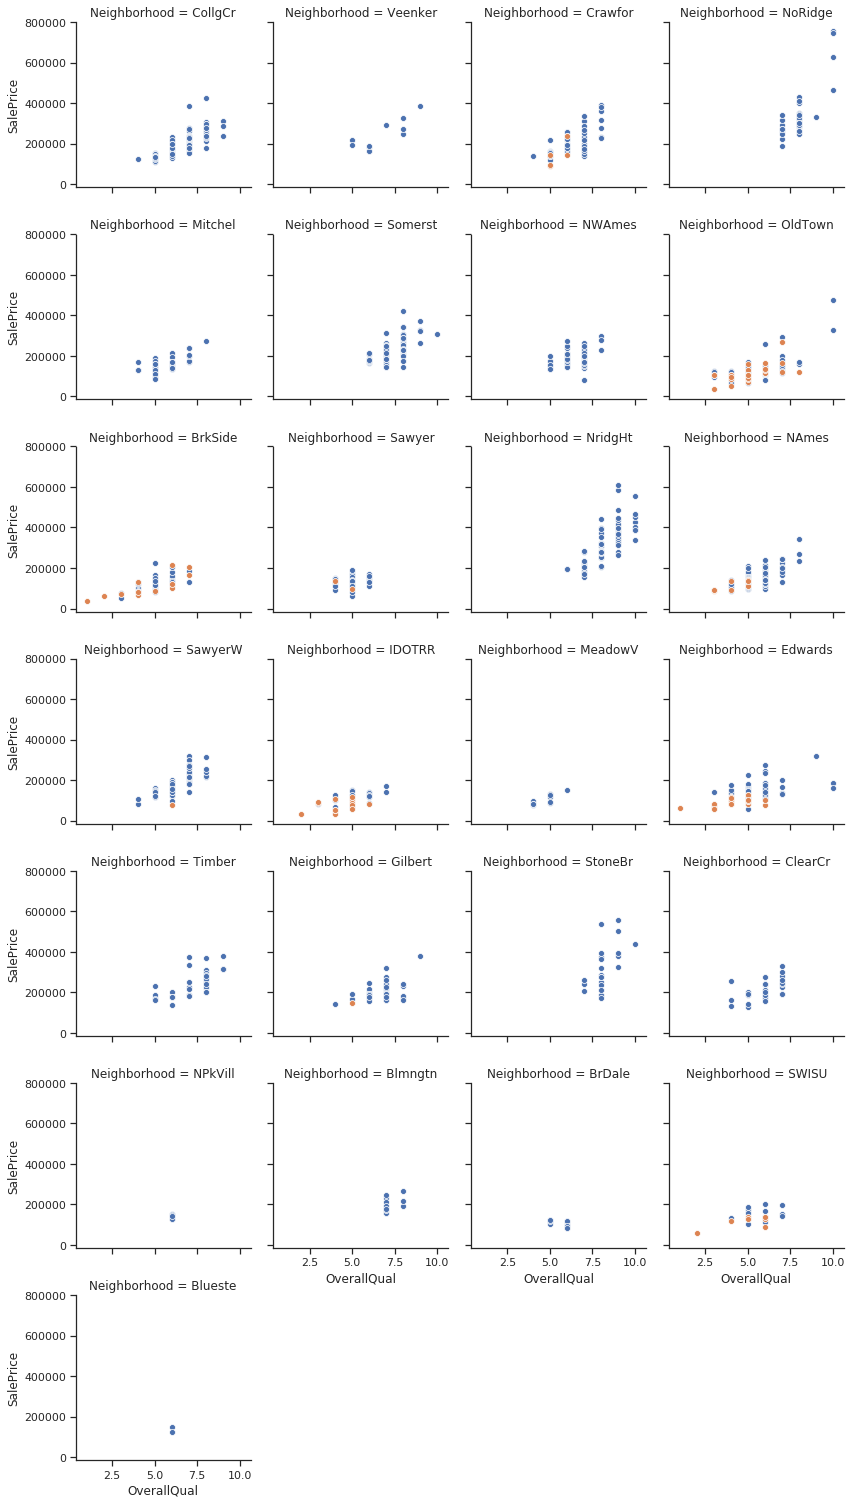

In [33]:
# Let's now combine the Overall Quality with the Sale Price and break it down based on Neighbourhoods and Central Air

cond_plot = sns.FacetGrid(data=df_adj, col='Neighborhood', hue='CentralAir', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice');

In [44]:
df_adj['SaleCondition']

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [46]:
# Changing the categorial variable into numerical

to_change = {'Normal' : 1, 'Abnorml' : 0}
df_adj = df_adj.replace(to_change)

In [47]:
df_adj['SaleCondition']

0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: SaleCondition, Length: 1460, dtype: object